In [1]:
import pandas as pd

data = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [2]:
data

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000001,9,9,1145.0,1316.0,0,0,SEA,14747,Washington,MFR,13264,Oregon,352.0,Horizon Air,AS,19687.0,N430QX,NaN
1,TRAIN_000002,4,10,825.0,1005.0,0,0,DEN,11292,Colorado,OAK,13796,California,957.0,Southwest Airlines Co.,WN,19393.0,N216WR,NaN
2,TRAIN_000003,10,19,954.0,1158.0,0,0,CLT,11057,North Carolina,ALB,10257,New York,646.0,NaN,AA,19805.0,N881NN,NaN
3,TRAIN_000004,4,29,1920.0,2247.0,0,0,EWR,11618,New Jersey,SJC,14831,NaN,2548.0,United Air Lines Inc.,UA,19977.0,N76288,NaN
4,TRAIN_000005,5,26,635.0,1100.0,0,0,PHX,14107,Arizona,HOU,12191,Texas,1020.0,Southwest Airlines Co.,WN,19393.0,N730SW,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,TRAIN_799996,8,2,605.0,836.0,0,0,EWR,11618,New Jersey,IAH,12266,Texas,1400.0,United Air Lines Inc.,UA,19977.0,N66828,NaN
799996,TRAIN_799997,9,17,NaN,NaN,0,0,MSP,13487,Minnesota,SEA,14747,Washington,1399.0,Delta Air Lines Inc.,DL,19790.0,N836DN,Delayed
799997,TRAIN_799998,11,23,1715.0,2021.0,0,0,PVD,14307,NaN,MCO,13204,Florida,1072.0,NaN,B6,20409.0,N523JB,Delayed
799998,TRAIN_799999,8,11,2029.0,505.0,0,0,SJC,14831,California,BOS,10721,Massachusetts,2689.0,JetBlue Airways,B6,20409.0,N661JB,NaN


In [3]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,799990,799991,799992,799993,799994,799995,799996,799997,799998,799999
ID,TRAIN_000001,TRAIN_000002,TRAIN_000003,TRAIN_000004,TRAIN_000005,TRAIN_000006,TRAIN_000007,TRAIN_000008,TRAIN_000009,TRAIN_000010,...,TRAIN_799991,TRAIN_799992,TRAIN_799993,TRAIN_799994,TRAIN_799995,TRAIN_799996,TRAIN_799997,TRAIN_799998,TRAIN_799999,TRAIN_800000
Month,9,4,10,4,5,10,9,5,9,8,...,8,12,10,4,6,8,9,11,8,5
Day_of_Month,9,10,19,29,26,24,19,5,19,1,...,29,1,31,17,7,2,17,23,11,9
Estimated_Departure_Time,1145.0,825.0,954.0,1920.0,635.0,718.0,1135.0,954.0,1205.0,2055.0,...,725.0,NaN,1405.0,2118.0,1145.0,605.0,NaN,1715.0,2029.0,950.0
Estimated_Arrival_Time,1316.0,1005.0,1158.0,2247.0,1100.0,1059.0,1305.0,1151.0,1345.0,2225.0,...,806.0,1301.0,1610.0,2253.0,1355.0,836.0,NaN,2021.0,505.0,1106.0
Cancelled,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Diverted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Origin_Airport,SEA,DEN,CLT,EWR,PHX,DFW,CLT,BOS,IND,BWI,...,HNL,ATW,MSY,SNA,PHX,EWR,MSP,PVD,SJC,DFW
Origin_Airport_ID,14747,11292,11057,11618,14107,11298,11057,10721,12339,10821,...,12173,10408,13495,14908,14107,11618,13487,14307,14831,11298
Origin_State,Washington,Colorado,North Carolina,New Jersey,Arizona,Texas,North Carolina,Massachusetts,Indiana,Maryland,...,Hawaii,NaN,Louisiana,California,Arizona,New Jersey,Minnesota,NaN,California,Texas


In [4]:
# 데이터 내부 확인

def resumetable(df):
    print('데이터셋 형상: ', df.shape)
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary= summary.reset_index()
    summary = summary.rename(columns={'index':'feature'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values

    return summary

In [5]:
resumetable(data)

데이터셋 형상:  (800000, 19)


,feature,데이터 타입,결측값 개수,고유값 개수
0,ID,object,0,800000
1,Month,int64,0,12
2,Day_of_Month,int64,0,31
3,Estimated_Departure_Time,float64,87077,1361
4,Estimated_Arrival_Time,float64,87143,1422
5,Cancelled,int64,0,1
6,Diverted,int64,0,1
7,Origin_Airport,object,0,374
8,Origin_Airport_ID,int64,0,374
9,Origin_State,object,87207,52


Origin_Airport_ID, Destination_Airport_ID, Carrier_Code(IATA), Carrier_ID(DOT)는 제거
Day_of_Month 제거 유력
Month를 활용해 계절로 바꾸는 방법 고민
Estimated_Arrival_Time - Estimated_Departure_Time를 하여 운행시간으로 바꾸기 고민, 혹시나 Estimated_Arrival_Time나 Estimated_Departure_Time 자체가 필요하다면(출발 or 도착 시간 느낌으로) 둘 중 하나만 사용
가능하다면 Origin_state와 Destination_State는 채워보기

In [7]:
#seacon feature만들기

def month_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# 계절 컬럼 추가
data['Season'] = data['Month'].apply(month_to_season)

In [8]:
#운행시간 feature만들기
data['Service hours'] = data['Estimated_Arrival_Time'] - data['Estimated_Departure_Time']

In [9]:
# (1) Origin_Airport와 Destination_Airport가 동일한 경우 찾기
same_airport = data[data['Origin_Airport'] == data['Destination_Airport']]

# (2) 같은 Origin_Airport (또는 Destination_Airport)끼리 State 정보를 가져올 딕셔너리 만들기
origin_state_map = data.dropna(subset=['Origin_State']).groupby('Origin_Airport')['Origin_State'].first().to_dict()
destination_state_map = data.dropna(subset=['Destination_State']).groupby('Destination_Airport')['Destination_State'].first().to_dict()

# (3) Origin_State가 null이면 같은 Origin_Airport 값에서 가져오기
data.loc[
    data['Origin_State'].isnull(),
    'Origin_State'
] = data.loc[
    data['Origin_State'].isnull(),
    'Origin_Airport'
].map(origin_state_map)

# (4) Destination_State가 null이면 같은 Destination_Airport 값에서 가져오기
data.loc[
    data['Destination_State'].isnull(),
    'Destination_State'
] = data.loc[
    data['Destination_State'].isnull(),
    'Destination_Airport'
].map(destination_state_map)

# (5) 추가로 Origin_Airport와 Destination_Airport가 동일한 경우에 State를 서로 채워주기
same_airport_rows = data['Origin_Airport'] == data['Destination_Airport']

# Origin_State가 null이고 Destination_State가 있다면
data.loc[
    same_airport_rows & data['Origin_State'].isnull() & data['Destination_State'].notnull(),
    'Origin_State'
] = data.loc[
    same_airport_rows & data['Origin_State'].isnull() & data['Destination_State'].notnull(),
    'Destination_State'
]

# Destination_State가 null이고 Origin_State가 있다면
data.loc[
    same_airport_rows & data['Destination_State'].isnull() & data['Origin_State'].notnull(),
    'Destination_State'
] = data.loc[
    same_airport_rows & data['Destination_State'].isnull() & data['Origin_State'].notnull(),
    'Origin_State'
]

In [29]:
data[['Origin_Airport', 'Origin_State', 'Destination_Airport', 'Destination_State']].isnull().sum()

Origin_Airport         0
Origin_State           0
Destination_Airport    0
Destination_State      1
dtype: int64

In [8]:
cate = data.select_dtypes(include=["object"]).keys()
cate = cate.drop('ID')
for var in cate:
    print(data[var].value_counts())

Origin_Airport
ORD    40253
ATL    35207
DEN    32339
LAX    25385
DFW    24615
       ...  
ADK       10
GST        8
DLG        7
AKN        7
BFM        4
Name: count, Length: 374, dtype: int64
Origin_State
California                                        82727
Texas                                             71122
Florida                                           53221
Illinois                                          46926
New York                                          34815
Georgia                                           33716
Colorado                                          31820
North Carolina                                    28351
Virginia                                          27303
Washington                                        20516
Pennsylvania                                      19033
Nevada                                            18693
Arizona                                           18131
Michigan                                          17884
New Je

In [14]:
# 데이터 시각화 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0.5, 1.0, 'target distribution')

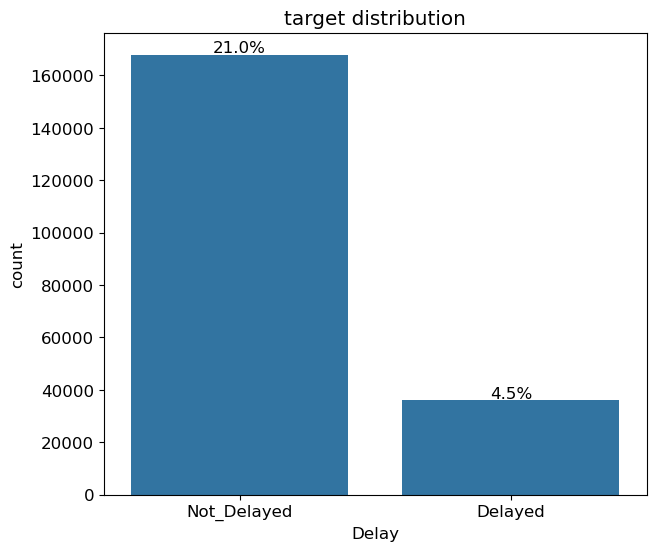

In [15]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''

    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100

        # (x, y) 좌표에 텍스트 입력
        ax.text(x = left_coord+ width/2.0, # x축 위치
                y = height+total_size*0.001,# y축 위치
                s = f'{percent:1.1f}%', # 입력 텍스트
                ha = 'center') # 가운데 정렬
                
plt.figure(figsize =(7,6))

ax = sns.countplot(x = 'Delay', data = data)
write_percent(ax, len(data))
ax.set_title('target distribution')

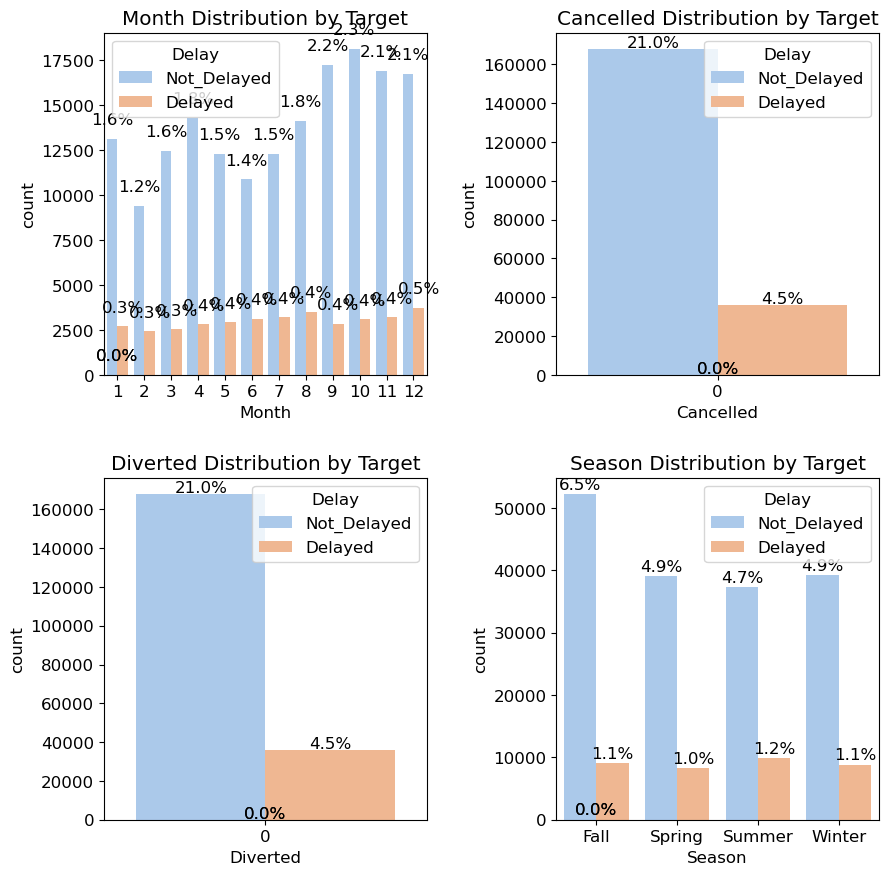

In [18]:
import matplotlib.gridspec as gridspec

#고유값이 적은얘들만 시각화
mpl.rc('font', size =12)
grid = gridspec.GridSpec(3,2) # 서브플롯을 3행 2열로 배치
plt.figure(figsize=(10,16))
plt.subplots_adjust(wspace=0.4, hspace= 0.3) # 서브플롯간 좌우 상화 여백 설정

tag_features = ['Month', 'Cancelled', 'Diverted', 'Season']

for idx, feature in enumerate(tag_features):
    ax = plt.subplot(grid[idx])

    sns.countplot(x = feature, data = data, hue = 'Delay', palette = 'pastel', ax = ax)

    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(data))

C:\Users\이성은\AppData\Local\Temp\ipykernel_28620\1896831299.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Delay'] == 'Not_Delayed']['Service hours'], label='Not Delayed', shade=True)
C:\Users\이성은\AppData\Local\Temp\ipykernel_28620\1896831299.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Delay'] == 'Delayed']['Service hours'], label='Delayed', shade=True)


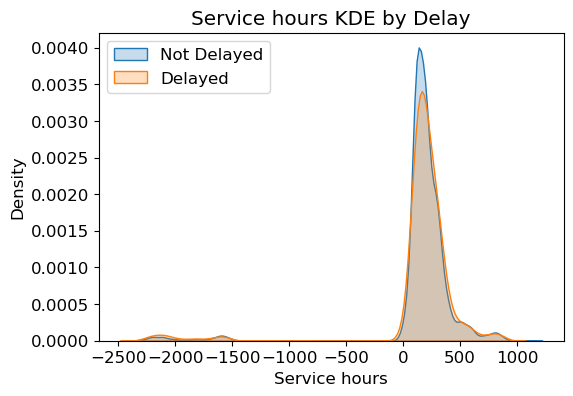

In [19]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['Delay'] == 'Not_Delayed']['Service hours'], label='Not Delayed', shade=True)
sns.kdeplot(data=data[data['Delay'] == 'Delayed']['Service hours'], label='Delayed', shade=True)
plt.title('Service hours KDE by Delay')
plt.legend()
plt.show()

C:\Users\이성은\AppData\Local\Temp\ipykernel_28620\2228489581.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Delay'] == 'Not_Delayed']['Estimated_Departure_Time'], label='Not Delayed', shade=True)
C:\Users\이성은\AppData\Local\Temp\ipykernel_28620\2228489581.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Delay'] == 'Delayed']['Estimated_Departure_Time'], label='Delayed', shade=True)


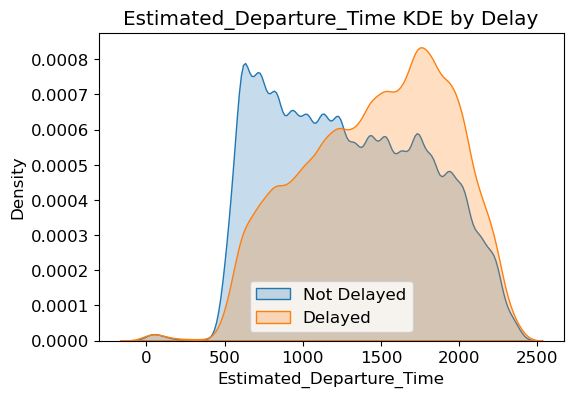

In [20]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['Delay'] == 'Not_Delayed']['Estimated_Departure_Time'], label='Not Delayed', shade=True)
sns.kdeplot(data=data[data['Delay'] == 'Delayed']['Estimated_Departure_Time'], label='Delayed', shade=True)
plt.title('Estimated_Departure_Time KDE by Delay')
plt.legend()
plt.show()

C:\Users\이성은\AppData\Local\Temp\ipykernel_28620\3395471435.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Delay'] == 'Not_Delayed']['Estimated_Arrival_Time'], label='Not Delayed', shade=True)
C:\Users\이성은\AppData\Local\Temp\ipykernel_28620\3395471435.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Delay'] == 'Delayed']['Estimated_Arrival_Time'], label='Delayed', shade=True)


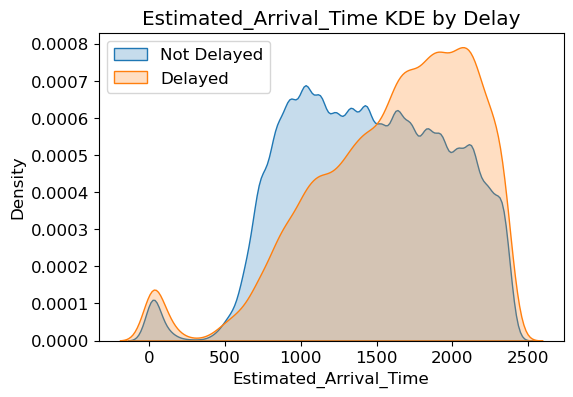

In [21]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['Delay'] == 'Not_Delayed']['Estimated_Arrival_Time'], label='Not Delayed', shade=True)
sns.kdeplot(data=data[data['Delay'] == 'Delayed']['Estimated_Arrival_Time'], label='Delayed', shade=True)
plt.title('Estimated_Arrival_Time KDE by Delay')
plt.legend()
plt.show()

C:\Users\이성은\AppData\Local\Temp\ipykernel_28620\3421606794.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Delay'] == 'Not_Delayed']['Distance'], label='Not Delayed', shade=True)
C:\Users\이성은\AppData\Local\Temp\ipykernel_28620\3421606794.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Delay'] == 'Delayed']['Distance'], label='Delayed', shade=True)


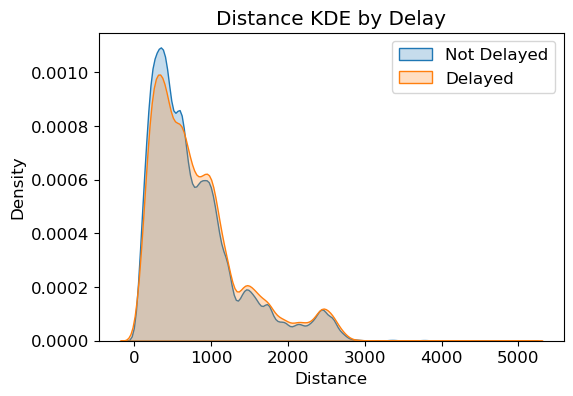

In [22]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['Delay'] == 'Not_Delayed']['Distance'], label='Not Delayed', shade=True)
sns.kdeplot(data=data[data['Delay'] == 'Delayed']['Distance'], label='Delayed', shade=True)
plt.title('Distance KDE by Delay')
plt.legend()
plt.show()

Error calculating Point-biserial correlation for Service hours: 'Service hours'


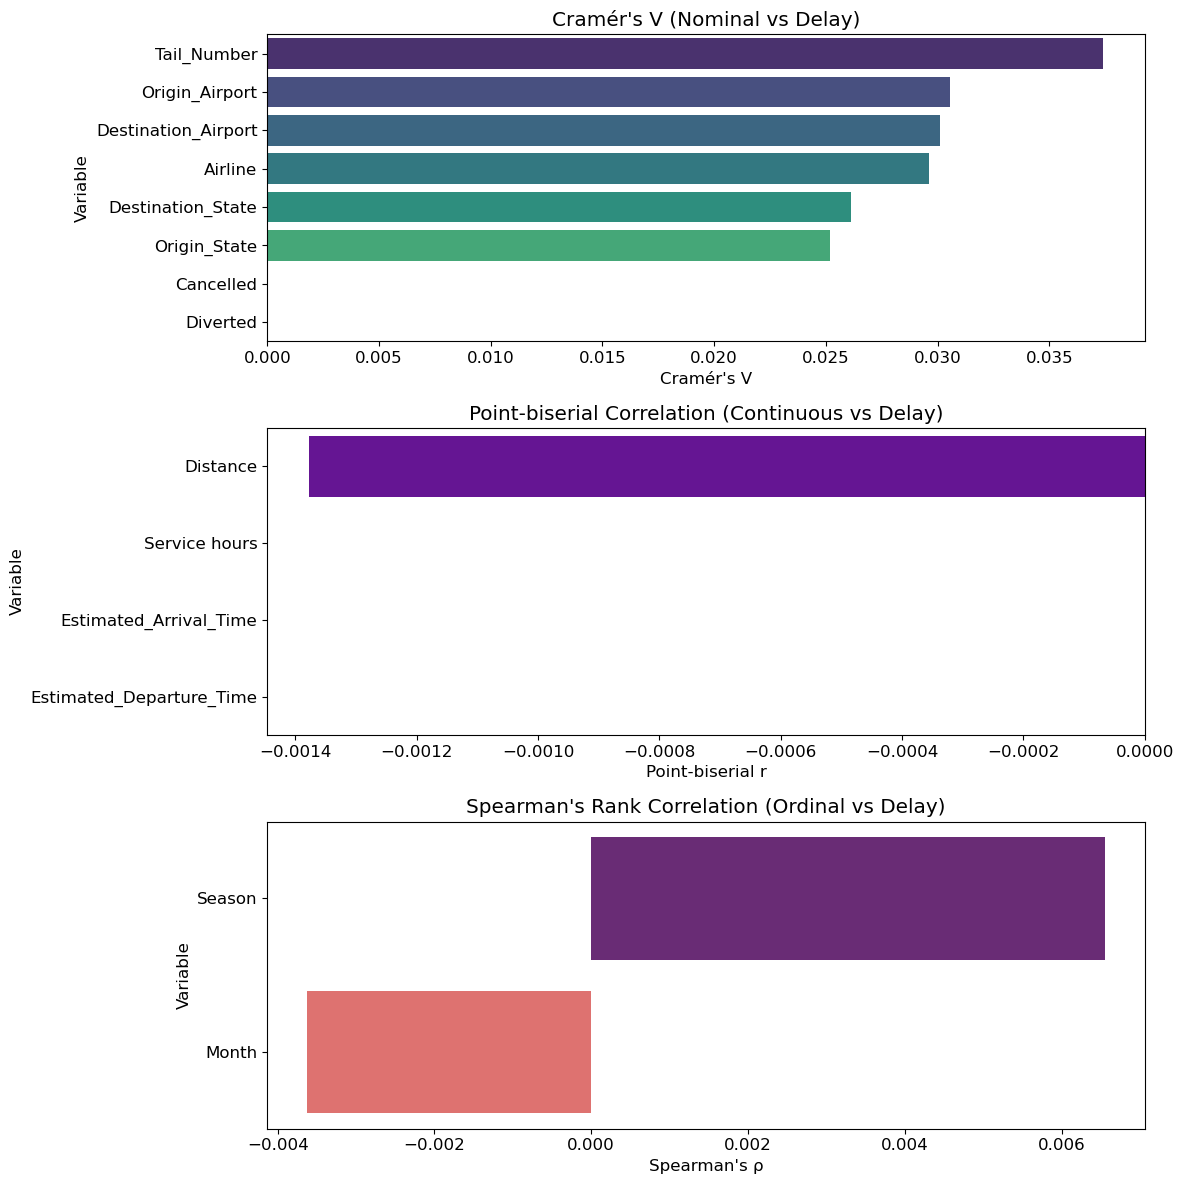

In [19]:
from scipy.stats import spearmanr, pointbiserialr
from sklearn.preprocessing import LabelEncoder
import scipy.stats as ss
import warnings
import numpy as np

warnings.filterwarnings("ignore")

# 🔹 target 컬럼 지정
target = 'Delay'

# 🔹 변수 리스트
nominal_vars = [
    'Cancelled', 'Diverted', 'Origin_Airport', 'Origin_State',
    'Destination_Airport', 'Destination_State', 'Airline', 'Tail_Number'
]
ordinal_vars = ['Month', 'Season']
continuous_vars = ['Service hours', 'Estimated_Arrival_Time', 'Estimated_Departure_Time', 'Distance']

# 🔹 Delay 컬럼 숫자형으로 인코딩 (예: Not_Delayed → 0, Delayed → 1)
if data[target].dtype == 'object':
    le_target = LabelEncoder()
    data[target] = le_target.fit_transform(data[target])

# 🔹 결과 저장용 리스트
cramer_results = []
pointbiserial_results = []
spearman_results = []

# 🔹 크래머의 V 계산 함수
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# 1️⃣ 순서 없는 범주형 (크래머의 V)
for var in nominal_vars:
    try:
        value = cramers_v(data[var], data[target])
        cramer_results.append({'Variable': var, 'Cramer_V': value})
    except Exception as e:
        cramer_results.append({'Variable': var, 'Cramer_V': np.nan})
        print(f"Error calculating Cramér's V for {var}: {e}")

# 2️⃣ 연속형 (포인트바이시리얼 상관)
for var in continuous_vars:
    try:
        r, _ = pointbiserialr(data[target], data[var])
        pointbiserial_results.append({'Variable': var, 'PointBiserial': r})
    except Exception as e:
        pointbiserial_results.append({'Variable': var, 'PointBiserial': np.nan})
        print(f"Error calculating Point-biserial correlation for {var}: {e}")

# 3️⃣ 순서형 (스피어만 상관)
for var in ordinal_vars:
    try:
        le = LabelEncoder()
        encoded_var = le.fit_transform(data[var])
        r, _ = spearmanr(encoded_var, data[target])
        spearman_results.append({'Variable': var, 'Spearman': r})
    except Exception as e:
        spearman_results.append({'Variable': var, 'Spearman': np.nan})
        print(f"Error calculating Spearman correlation for {var}: {e}")

# 🔹 시각화
plt.figure(figsize=(12, 12))

# 크래머의 V
plt.subplot(3, 1, 1)
cramer_df = pd.DataFrame(cramer_results).sort_values('Cramer_V', ascending=False)
sns.barplot(x='Cramer_V', y='Variable', data=cramer_df, palette='viridis')
plt.title("Cramér's V (Nominal vs Delay)")
plt.xlabel("Cramér's V")
plt.ylabel("Variable")

# 포인트바이시리얼
plt.subplot(3, 1, 2)
pb_df = pd.DataFrame(pointbiserial_results).sort_values('PointBiserial', ascending=False)
sns.barplot(x='PointBiserial', y='Variable', data=pb_df, palette='plasma')
plt.title("Point-biserial Correlation (Continuous vs Delay)")
plt.xlabel("Point-biserial r")
plt.ylabel("Variable")

# 스피어만
plt.subplot(3, 1, 3)
spearman_df = pd.DataFrame(spearman_results).sort_values('Spearman', ascending=False)
sns.barplot(x='Spearman', y='Variable', data=spearman_df, palette='magma')
plt.title("Spearman's Rank Correlation (Ordinal vs Delay)")
plt.xlabel("Spearman's ρ")
plt.ylabel("Variable")

plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split

# 1️⃣ Null 값 제거
valid_idx = y_test.dropna().index
y_test_clean = y_test.loc[valid_idx]

# 2️⃣ y_test 문자열 → 숫자로 변환
y_test_clean = y_test_clean.map({'Not_Delayed': 0, 'Delayed': 1})

# 3️⃣ Not_Delayed를 전부 1로 예측
y_pred_all_not_delayed = np.zeros(len(y_test_clean))

# 4️⃣ 정확도 계산
accuracy = accuracy_score(y_test_clean, y_pred_all_not_delayed)

# 5️⃣ 로그로스 계산
logloss = log_loss(y_test_clean, y_pred_all_not_delayed)

print(f"✅ 모든 Not_Delayed 예측일 때 Accuracy: {accuracy:.4f}")
print(f"✅ 모든 Not_Delayed 예측일 때 Log Loss: {logloss:.4f}")


✅ 모든 Not_Delayed 예측일 때 Accuracy: 0.8233
✅ 모든 Not_Delayed 예측일 때 Log Loss: 6.3683


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 데이터 클리닝
df_cleaned = data[data['Delay'].notnull()].copy()

# Delay Label Encoding
if df_cleaned['Delay'].dtype == 'object':
    le = LabelEncoder()
    df_cleaned['Delay'] = le.fit_transform(df_cleaned['Delay'])

# Feature list
features = ['Destination_State', 'Airline', 'Tail_Number', 'Origin_State', 'Estimated_Departure_Time']
cat_features = ['Destination_State', 'Airline', 'Tail_Number', 'Origin_State']

# 결측치 제거
df_cleaned.dropna(subset=features, inplace=True)

# 범주형 변수 Label Encoding
X_encoded = df_cleaned[features].copy()
for col in cat_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    df_cleaned['Delay'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df_cleaned['Delay']
)

# ========================
# 모델 학습 및 평가
results = []

models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for model_name, model in models.items():
    if model_name == 'CatBoost':
        cat_indices = [X_train.columns.get_loc(col) for col in cat_features]
        model.fit(X_train, y_train, cat_features=cat_indices)
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # 예측 확률로 Not_Delayed와 Delayed 분리
    result_df = pd.DataFrame({
        'Not_Delayed': y_pred_proba[:, 0],
        'Delayed': y_pred_proba[:, 1]
    })
    
    # 평가
    acc = accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba)
    
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'LogLoss': logloss
    })

# ========================
# 결과 출력
results_df = pd.DataFrame(results)
print(results_df)

C:\Users\이성은\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[LightGBM] [Info] Number of positive: 106811, number of negative: 22954
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 129765, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.823111 -> initscore=1.537569
[LightGBM] [Info] Start training from score 1.537569
          Model  Accuracy    LogLoss
0  DecisionTree  0.714259  10.222272
1  RandomForest  0.794217   0.599665
2      CatBoost  0.823315   0.445774
3      LightGBM  0.823161   0.446335
4       XGBoost  0.822606   0.450387


In [13]:
filtered_data = data[data['Delay'].notnull()].copy()
filtered_data.to_csv('filtered_data.csv', index=False)

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

data = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

# 2️⃣ 공통 전처리 함수 정의
def fill_states(df):
    # (1) Origin_Airport와 Destination_Airport가 동일한 경우 찾기
    same_airport = df[df['Origin_Airport'] == df['Destination_Airport']]

    # (2) Origin_State, Destination_State 맵핑 딕셔너리 만들기
    origin_state_map = df.dropna(subset=['Origin_State']).groupby('Origin_Airport')['Origin_State'].first().to_dict()
    destination_state_map = df.dropna(subset=['Destination_State']).groupby('Destination_Airport')['Destination_State'].first().to_dict()

    # (3) Origin_State 채우기
    df.loc[
        df['Origin_State'].isnull(),
        'Origin_State'
    ] = df.loc[
        df['Origin_State'].isnull(),
        'Origin_Airport'
    ].map(origin_state_map)

    # (4) Destination_State 채우기
    df.loc[
        df['Destination_State'].isnull(),
        'Destination_State'
    ] = df.loc[
        df['Destination_State'].isnull(),
        'Destination_Airport'
    ].map(destination_state_map)

    # (5) Origin_Airport와 Destination_Airport 동일한 경우 State 상호보완
    same_airport_rows = df['Origin_Airport'] == df['Destination_Airport']

    df.loc[
        same_airport_rows & df['Origin_State'].isnull() & df['Destination_State'].notnull(),
        'Origin_State'
    ] = df.loc[
        same_airport_rows & df['Origin_State'].isnull() & df['Destination_State'].notnull(),
        'Destination_State'
    ]

    df.loc[
        same_airport_rows & df['Destination_State'].isnull() & df['Origin_State'].notnull(),
        'Destination_State'
    ] = df.loc[
        same_airport_rows & df['Destination_State'].isnull() & df['Origin_State'].notnull(),
        'Origin_State'
    ]
    return df

# 3️⃣ train/test 모두 전처리 적용
data = fill_states(data)
test_data = fill_states(test)

# 4️⃣ 사용할 컬럼 선택
selected_columns = ['Destination_State', 'Airline', 'Tail_Number', 'Origin_State', 'Estimated_Departure_Time', 'Delay']
data = data[selected_columns].dropna().copy()
test_X = test_data[selected_columns[:-1]].copy()

# 5️⃣ Feature와 Target 분리
X = data[selected_columns[:-1]].copy()
y = data['Delay']

# 6️⃣ Label Encoding (범주형 변수)
categorical_cols = ['Destination_State', 'Airline', 'Tail_Number', 'Origin_State']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    # 1️⃣ train 데이터 LabelEncoder 학습
    X[col] = X[col].astype(str)
    le.fit(X[col])
    X[col] = le.transform(X[col])
    le_dict[col] = le

    # 2️⃣ test 데이터 unseen label → 'Unknown'
    test_X[col] = test_X[col].astype(str)
    test_X[col] = test_X[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
    
    # 3️⃣ train과 동일한 LabelEncoder에 Unknown label 추가
    if 'Unknown' not in le.classes_:
        le.classes_ = np.append(le.classes_, 'Unknown')
    
    test_X[col] = le.transform(test_X[col])

# 7️⃣ Target Label Encoding
target_le = LabelEncoder()
y = target_le.fit_transform(y)

params_xgb = {
    'n_estimators': 255,
    'max_depth': 5,
    'learning_rate': 0.042817147696605336,
    'subsample': 0.8558217189748776,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'random_state': 42,
    'n_jobs': -1,
    'verbosity': 0
}

# 🔟 XGBoost 학습 및 예측
model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb.fit(X, y)
pred_xgb_proba = model_xgb.predict_proba(test_X)
result_xgb = pd.DataFrame({
    'ID': test_X.index,
    'Not_Delayed': pred_xgb_proba[:, 0],
    'Delayed': pred_xgb_proba[:, 1]
})
result_xgb.to_csv('ML_60212770_HW3_test.csv', index=False)

C:\Users\이성은\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
